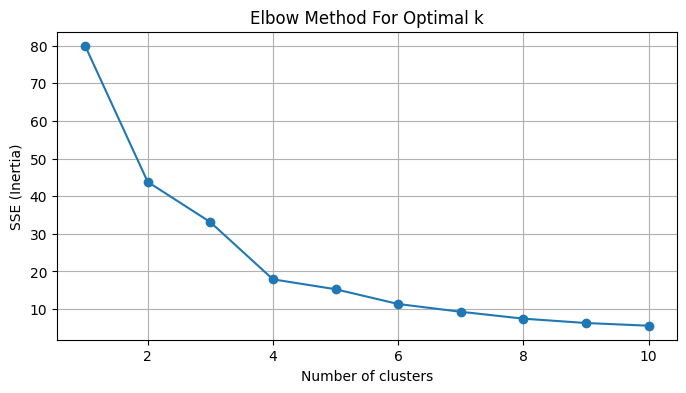

Approximate Clustering Accuracy: 0.70


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt

# Step 1: Generate sample data and save to CSV
np.random.seed(42)
names = [f"Person_{i}" for i in range(50)]
ages = np.random.randint(20, 60, 50)
income = np.random.randint(30000, 120000, 50)

df = pd.DataFrame({'Name': names, 'Age': ages, 'Income': income})
df.to_csv("income.csv", index=False)

# Step 2: Load the data
data = pd.read_csv("income.csv")

# Drop 'Name' and extract features
X = data[['Age', 'Income']]

# Step 3: Split the data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 4: Perform scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Plot SSE vs number of clusters (Elbow method)
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 6: Choose optimal number of clusters (say 3) and fit model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Predict on test data
predictions = kmeans.predict(X_test_scaled)

# Note: There's no ground truth labels, but for demonstration,
# we can try assigning true clusters (via KMeans on full data)
# and see if predicted clusters align

# Fit on full data to assign pseudo-labels
full_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
true_clusters = full_kmeans.fit_predict(scaler.fit_transform(X))

# Align predicted clusters using majority voting (only for demonstration)
# Match predicted labels to closest true labels
def map_clusters(true_labels, pred_labels):
    labels = np.zeros_like(pred_labels)
    for i in range(optimal_k):
        mask = (pred_labels == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(true_labels[mask])[0]
    return labels

mapped_preds = map_clusters(true_clusters[X_test.index], predictions)
accuracy = accuracy_score(true_clusters[X_test.index], mapped_preds)
print(f"Approximate Clustering Accuracy: {accuracy:.2f}")


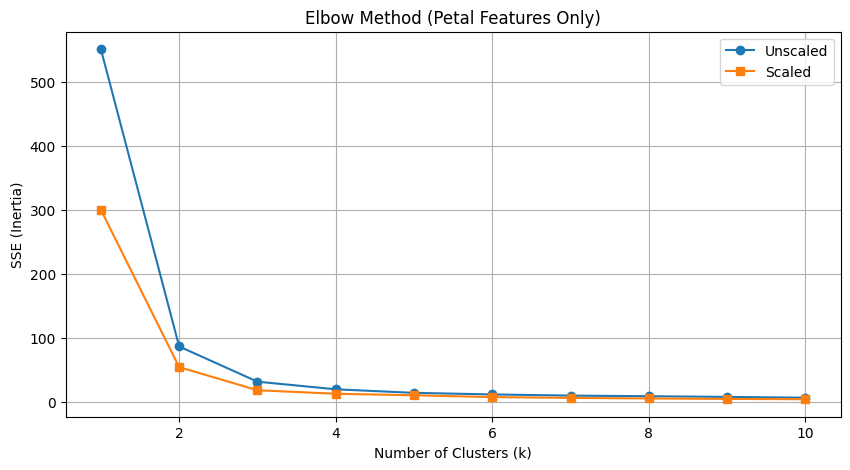

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Keep only petal length and petal width
X = df[['petal length (cm)', 'petal width (cm)']].values

# Step 2: Check impact of scaling
# Try without scaling
sse_unscaled = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse_unscaled.append(kmeans.inertia_)

# Now scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse_scaled = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse_scaled.append(kmeans.inertia_)

# Step 3: Plot Elbow Comparison (Scaled vs Unscaled)
plt.figure(figsize=(10, 5))

plt.plot(range(1, 11), sse_unscaled, marker='o', label='Unscaled')
plt.plot(range(1, 11), sse_scaled, marker='s', label='Scaled')
plt.title('Elbow Method (Petal Features Only)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.legend()
plt.grid(True)
plt.show()
